In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/ML_Assignment/ML_A1_Inputs.csv", names=["X1","X2","y"])
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

     X1    X2    y
0 -0.55  0.56 -1.0
1  0.92  0.68  1.0
2  0.52  0.12  1.0
3 -0.17  0.88 -1.0
4  0.59  0.69 -1.0


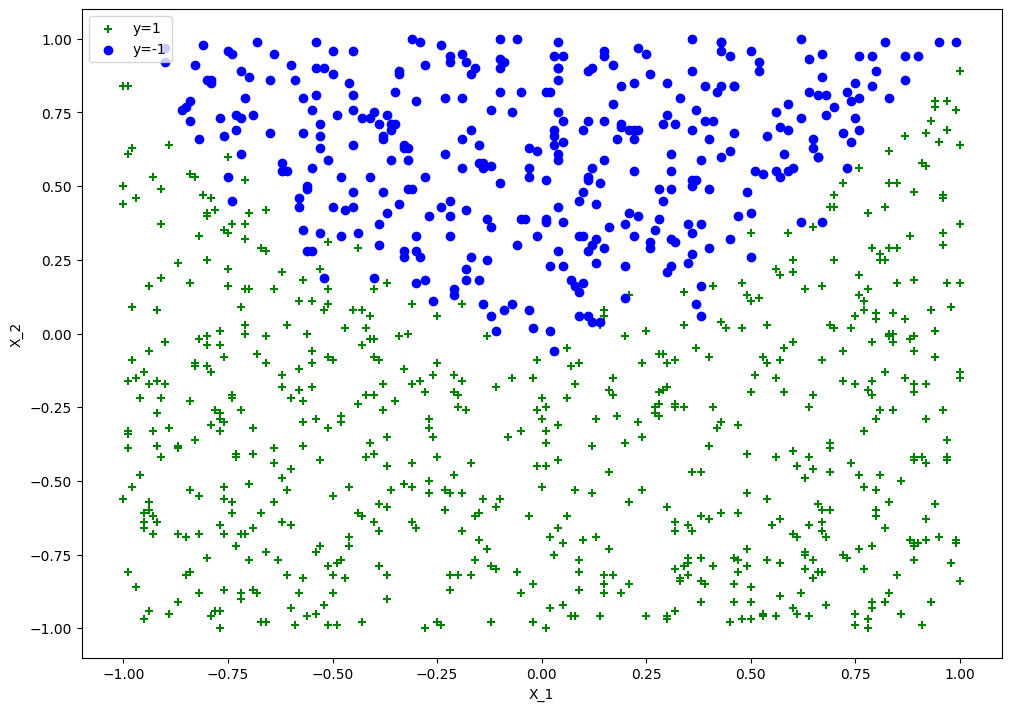

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', size=10)
plt.rcParams['figure.constrained_layout.use'] = True
fig, ax = plt.subplots(figsize=(10, 7),dpi=100)
pve = y > 0
nve = y < 0
ax.scatter(X[pve,0], X[pve,1], c='g', marker='+', label='y=1')
ax.scatter(X[nve,0], X[nve,1], c='b', marker='o', label='y=-1')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.legend()
fig.savefig('Asmt1_image1.png')

In [4]:
# Training logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_X, val_X, train_y, val_y = train_test_split(X, y)
LR_model = LogisticRegression().fit(train_X, train_y)
LR_predictions = LR_model.predict(val_X)

LR_c = LR_model.intercept_
LR_theta0 = LR_model.coef_[0][0]
LR_theta1 = LR_model.coef_[0][1]
print(f"Model Intercept = {LR_c[0]}\nFirst Coefficient = {LR_theta0}\nSecond Coefficient = {LR_theta1}")
print(f"Model Accuracy = {accuracy_score(LR_predictions, val_y)}")

Model Intercept = 1.597245451743122
First Coefficient = 0.4047593591980991
Second Coefficient = -5.091231938809213
Model Accuracy = 0.896


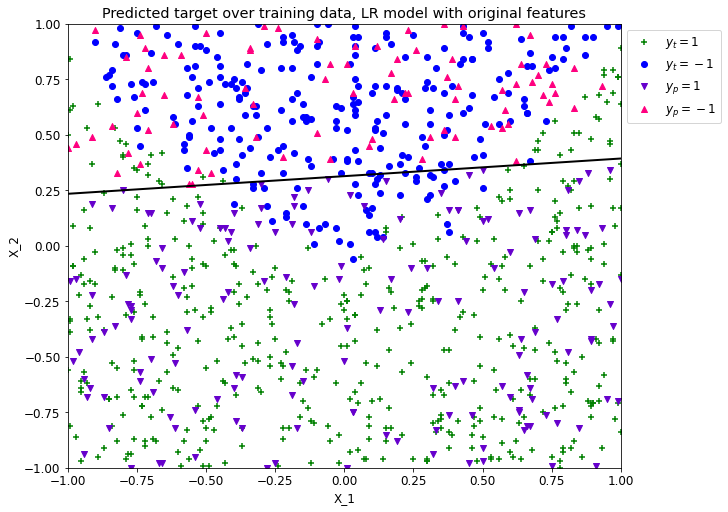

In [5]:
#Plotting decision boundary for predicted Logistic Regression model
p1 = []
p2 = []
for i in val_X:
  p1.append(i[0])
  p2.append(i[1])
P1 = np.array(p1)
P2 = np.array(p2)
t1 = []
t2 = []
for i in train_X:
  t1.append(i[0])
  t2.append(i[1])
T1 = np.array(t1)
T2 = np.array(t2)

b = LR_model.intercept_[0]
w1, w2 = LR_model.coef_.T

xmin, xmax = -1, 1
ymin, ymax = -1, 1
xd = np.array([xmin, xmax])
yd = -(b+w1*xd)/w2

plt.figure(figsize=(10,7))
plt.rc('font', size =12)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
plt.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
plt.scatter(P1[LR_predictions==1],P2[LR_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
plt.scatter(P1[LR_predictions==-1],P2[LR_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
plt.plot(xd, yd, 'black', lw=2)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('X_2')
plt.xlabel('X_1')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Predicted target over training data, LR model with original features", loc='center')
plt.show()

In [6]:
#SVC model with default penalty, C=1
from sklearn.svm import LinearSVC
SVC1_model = LinearSVC().fit(train_X, train_y)
SVC1_predictions = SVC1_model.predict(val_X)

SVC1_c = SVC1_model.intercept_
SVC1_theta0 = SVC1_model.coef_[0][0]
SVC1_theta1 = SVC1_model.coef_[0][1]
print(f"Model Intercept = {SVC1_c[0]}\nFirst Coefficient = {SVC1_theta0}\nSecond Coefficient = {SVC1_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC1_predictions, val_y)}")

# Retrieve the model parameters.
SVC1_b = SVC1_model.intercept_[0]
SVC1_w1, SVC1_w2 = SVC1_model.coef_.T

SVC1_xd = np.array([xmin, xmax])
SVC1_yd = -(SVC1_b+SVC1_w1*SVC1_xd)/SVC1_w2

Model Intercept = 0.5888139601109078
First Coefficient = 0.1565756481722129
Second Coefficient = -1.916325475349682
Model Accuracy = 0.892


In [7]:
#SVC model with penalty, C=0.1
from sklearn.svm import LinearSVC
SVC2_model = LinearSVC(C=0.1).fit(train_X, train_y)
SVC2_predictions = SVC2_model.predict(val_X)

SVC2_c = SVC2_model.intercept_
SVC2_theta0 = SVC2_model.coef_[0][0]
SVC2_theta1 = SVC2_model.coef_[0][1]
print(f"Model Intercept = {SVC2_c[0]}\nFirst Coefficient = {SVC2_theta0}\nSecond Coefficient = {SVC2_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC2_predictions, val_y)}")

# Retrieve the model parameters.
SVC2_b = SVC2_model.intercept_[0]
SVC2_w1, SVC2_w2 = SVC2_model.coef_.T

SVC2_xd = np.array([xmin, xmax])
SVC2_yd = -(SVC2_b+SVC2_w1*SVC2_xd)/SVC2_w2

Model Intercept = 0.5227645558778498
First Coefficient = 0.13828318674246456
Second Coefficient = -1.7257810758397085
Model Accuracy = 0.9


In [8]:
#SVC model with penalty, C=0.01
from sklearn.svm import LinearSVC
SVC3_model = LinearSVC(C=0.01).fit(train_X, train_y)
SVC3_predictions = SVC3_model.predict(val_X)

SVC3_c = SVC3_model.intercept_
SVC3_theta0 = SVC3_model.coef_[0][0]
SVC3_theta1 = SVC3_model.coef_[0][1]
print(f"Model Intercept = {SVC3_c[0]}\nFirst Coefficient = {SVC3_theta0}\nSecond Coefficient = {SVC3_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC3_predictions, val_y)}")

# Retrieve the model parameters.
SVC3_b = SVC3_model.intercept_[0]
SVC3_w1, SVC3_w2 = SVC3_model.coef_.T

SVC3_xd = np.array([xmin, xmax])
SVC3_yd = -(SVC3_b+SVC3_w1*SVC3_xd)/SVC3_w2

Model Intercept = 0.3209797055817949
First Coefficient = 0.07017476119684221
Second Coefficient = -1.119494262077662
Model Accuracy = 0.9


In [9]:
#SVC model with penalty, C=0.001
from sklearn.svm import LinearSVC
SVC4_model = LinearSVC(C=0.001).fit(train_X, train_y)
SVC4_predictions = SVC4_model.predict(val_X)

SVC4_c = SVC4_model.intercept_
SVC4_theta0 = SVC4_model.coef_[0][0]
SVC4_theta1 = SVC4_model.coef_[0][1]
print(f"Model Intercept = {SVC4_c[0]}\nFirst Coefficient = {SVC4_theta0}\nSecond Coefficient = {SVC4_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC4_predictions, val_y)}")

# Retrieve the model parameters.
SVC4_b = SVC4_model.intercept_[0]
SVC4_w1, SVC4_w2 = SVC4_model.coef_.T

SVC4_xd = np.array([xmin, xmax])
SVC4_yd = -(SVC4_b+SVC4_w1*SVC4_xd)/SVC4_w2

Model Intercept = 0.17358738769429102
First Coefficient = 0.018355759216687112
Second Coefficient = -0.41527077254860917
Model Accuracy = 0.872


In [10]:
#SVC model with penalty, C=10
from sklearn.svm import LinearSVC
SVC5_model = LinearSVC(C=10).fit(train_X, train_y)
SVC5_predictions = SVC5_model.predict(val_X)

SVC5_c = SVC5_model.intercept_
SVC5_theta0 = SVC5_model.coef_[0][0]
SVC5_theta1 = SVC5_model.coef_[0][1]
print(f"Model Intercept = {SVC5_c[0]}\nFirst Coefficient = {SVC5_theta0}\nSecond Coefficient = {SVC5_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC5_predictions, val_y)}")

# Retrieve the model parameters.
SVC5_b = SVC5_model.intercept_[0]
SVC5_w1, SVC5_w2 = SVC5_model.coef_.T

SVC5_xd = np.array([xmin, xmax])
SVC5_yd = -(SVC5_b+SVC5_w1*SVC5_xd)/SVC5_w2

Model Intercept = 0.5979529853399166
First Coefficient = 0.15919261155865055
Second Coefficient = -1.9421943313506886
Model Accuracy = 0.892


In [11]:
#SVC model with penalty, C=100
from sklearn.svm import LinearSVC
SVC6_model = LinearSVC(C=100,max_iter=10000).fit(train_X, train_y)
SVC6_predictions = SVC6_model.predict(val_X)

SVC6_c = SVC6_model.intercept_
SVC6_theta0 = SVC6_model.coef_[0][0]
SVC6_theta1 = SVC6_model.coef_[0][1]
print(f"Model Intercept = {SVC6_c[0]}\nFirst Coefficient = {SVC6_theta0}\nSecond Coefficient = {SVC6_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC6_predictions, val_y)}")

# Retrieve the model parameters.
SVC6_b = SVC6_model.intercept_[0]
SVC6_w1, SVC6_w2 = SVC6_model.coef_.T

SVC6_xd = np.array([xmin, xmax])
SVC6_yd = -(SVC6_b+SVC6_w1*SVC6_xd)/SVC6_w2

Model Intercept = 0.5988878695121425
First Coefficient = 0.15945844140060883
Second Coefficient = -1.9448486561108187
Model Accuracy = 0.892


In [12]:
#SVC model with penalty, C=1000
from sklearn.svm import LinearSVC
SVC7_model = LinearSVC(C=1000,max_iter=100000).fit(train_X, train_y)
SVC7_predictions = SVC7_model.predict(val_X)

SVC7_c = SVC7_model.intercept_
SVC7_theta0 = SVC7_model.coef_[0][0]
SVC7_theta1 = SVC7_model.coef_[0][1]
print(f"Model Intercept = {SVC7_c[0]}\nFirst Coefficient = {SVC7_theta0}\nSecond Coefficient = {SVC7_theta1}")
print(f"Model Accuracy = {accuracy_score(SVC7_predictions, val_y)}")

# Retrieve the model parameters.
SVC7_b = SVC7_model.intercept_[0]
SVC7_w1, SVC7_w2 = SVC7_model.coef_.T

SVC7_xd = np.array([xmin, xmax])
SVC7_yd = -(SVC7_b+SVC7_w1*SVC7_xd)/SVC7_w2

Model Intercept = 0.5989809811114397
First Coefficient = 0.1594866633554745
Second Coefficient = -1.945114416954484
Model Accuracy = 0.892


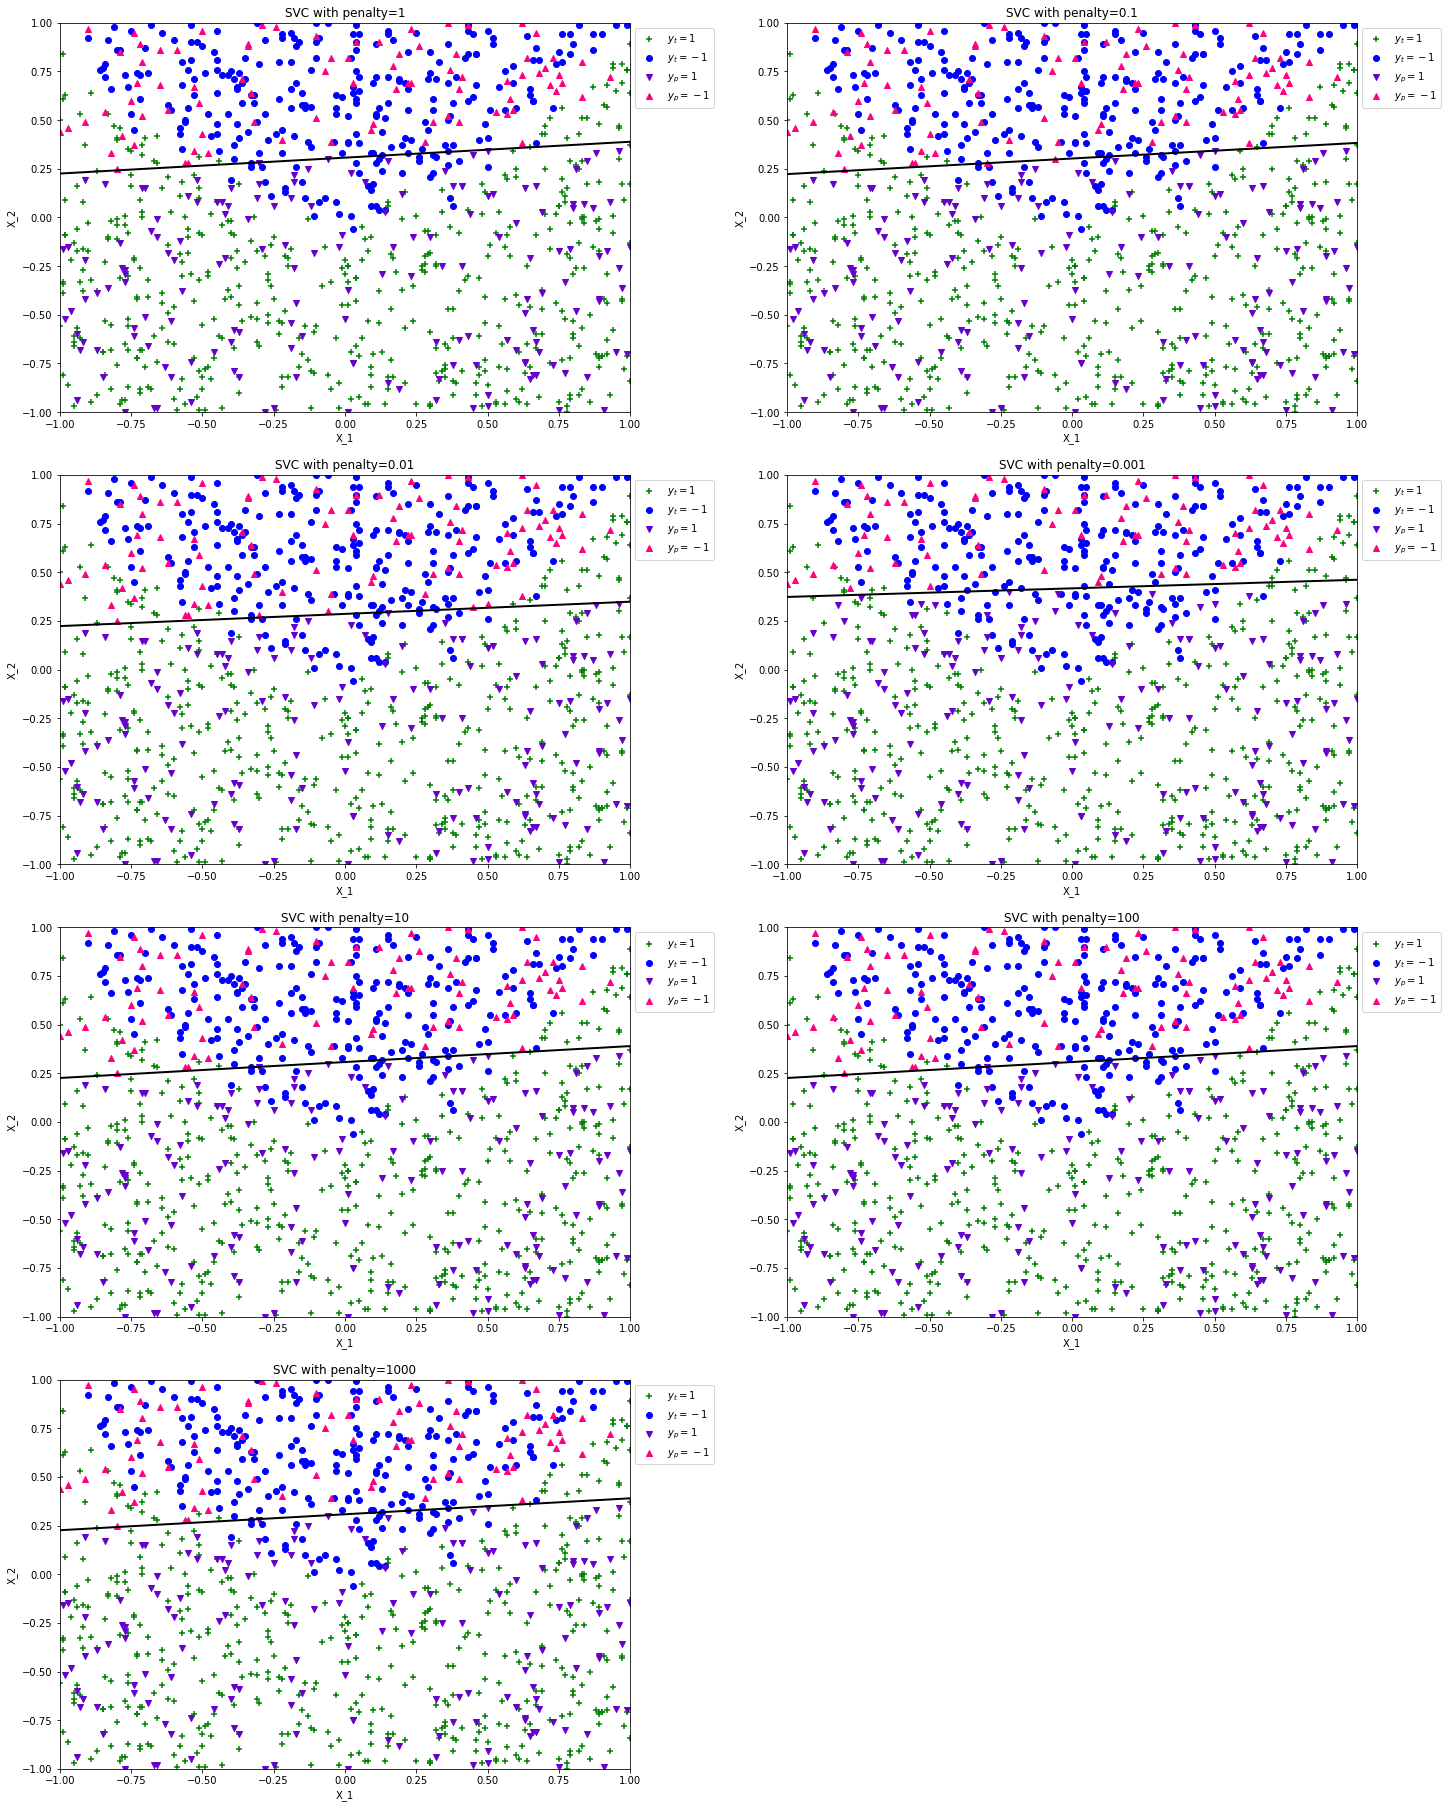

In [13]:
plt.rc('font', size =10)
plt.rcParams['figure.figsize'] = (20,25)
# plt.figure(figsize=(25,25))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(4, 2)


ax1.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax1.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax1.scatter(P1[SVC1_predictions==1],P2[SVC1_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax1.scatter(P1[SVC1_predictions==-1],P2[SVC1_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax1.plot(SVC1_xd, SVC1_yd, 'black', lw=2)
ax1.set_title("SVC with penalty=1", loc='center')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_ylabel('X_2')
ax1.set_xlabel('X_1')
ax1.legend(bbox_to_anchor=(1, 1))

ax2.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax2.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax2.scatter(P1[SVC2_predictions==1],P2[SVC2_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax2.scatter(P1[SVC2_predictions==-1],P2[SVC2_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax2.plot(SVC2_xd, SVC2_yd, 'black', lw=2)
ax2.set_title("SVC with penalty=0.1", loc='center')
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_ylabel('X_2')
ax2.set_xlabel('X_1')
ax2.legend(bbox_to_anchor=(1, 1))

ax3.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax3.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax3.scatter(P1[SVC3_predictions==1],P2[SVC3_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax3.scatter(P1[SVC3_predictions==-1],P2[SVC3_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax3.plot(SVC3_xd, SVC3_yd, 'black', lw=2)
ax3.set_title("SVC with penalty=0.01", loc='center')
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax3.set_ylabel('X_2')
ax3.set_xlabel('X_1')
ax3.legend(bbox_to_anchor=(1, 1))

ax4.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax4.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax4.scatter(P1[SVC4_predictions==1],P2[SVC4_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax4.scatter(P1[SVC4_predictions==-1],P2[SVC4_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax4.plot(SVC4_xd, SVC4_yd, 'black', lw=2)
ax4.set_title("SVC with penalty=0.001", loc='center')
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_ylabel('X_2')
ax4.set_xlabel('X_1')
ax4.legend(bbox_to_anchor=(1, 1))

ax5.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax5.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax5.scatter(P1[SVC5_predictions==1],P2[SVC5_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax5.scatter(P1[SVC5_predictions==-1],P2[SVC5_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax5.plot(SVC5_xd, SVC5_yd, 'black', lw=2)
ax5.set_title("SVC with penalty=10", loc='center')
ax5.set_xlim(xmin, xmax)
ax5.set_ylim(ymin, ymax)
ax5.set_ylabel('X_2')
ax5.set_xlabel('X_1')
ax5.legend(bbox_to_anchor=(1, 1))

ax6.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax6.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax6.scatter(P1[SVC6_predictions==1],P2[SVC6_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax6.scatter(P1[SVC6_predictions==-1],P2[SVC6_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax6.plot(SVC6_xd, SVC6_yd, 'black', lw=2)
ax6.set_title("SVC with penalty=100", loc='center')
ax6.set_xlim(xmin, xmax)
ax6.set_ylim(ymin, ymax)
ax6.set_ylabel('X_2')
ax6.set_xlabel('X_1')
ax6.legend(bbox_to_anchor=(1, 1))

ax7.scatter(T1[train_y==1],T2[train_y==1],c='g',marker='+', label=r'$y_t=1$') 
ax7.scatter(T1[train_y==-1],T2[train_y==-1],c='b',marker='o', label=r'$y_t=-1$')
ax7.scatter(P1[SVC7_predictions==1],P2[SVC7_predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
ax7.scatter(P1[SVC7_predictions==-1],P2[SVC7_predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
ax7.plot(SVC7_xd, SVC7_yd, 'black', lw=2)
ax7.set_title("SVC with penalty=1000", loc='center')
ax7.set_xlim(xmin, xmax)
ax7.set_ylim(ymin, ymax)
ax7.set_ylabel('X_2')
ax7.set_xlabel('X_1')
ax7.legend(bbox_to_anchor=(1, 1))

ax8.axis('off')

plt.show()

In [14]:
#Creating 2 new additional features
X3 = X1**2
X4 = X2**2
X_new=np.column_stack((X,X3,X4))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y)
model = LogisticRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

C = model.intercept_
theta0 = model.coef_[0][0]
theta1 = model.coef_[0][1]
theta2 = model.coef_[0][2]
theta3 = model.coef_[0][3]
print(f"Model Intercept = {C[0]}\nFirst Coefficient = {theta0}\nSecond Coefficient = {theta1}\nThird Coefficient = {theta2}\nFourth Coefficient = {theta3}")
print(f"Model Accuracy = {accuracy_score(predictions, y_test)}")

Model Intercept = 0.3009785215813226
First Coefficient = 0.10265163115686526
Second Coefficient = -6.226581121006021
Third Coefficient = 5.890855731782319
Fourth Coefficient = -1.0641751886481097
Model Accuracy = 0.972


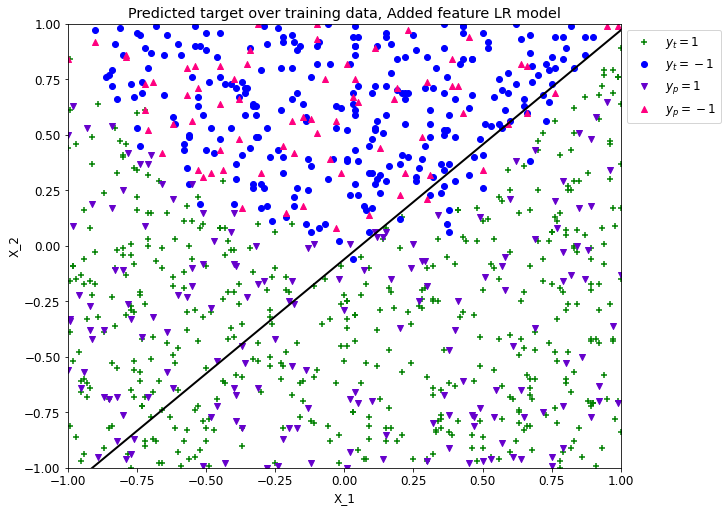

In [16]:
a1 = []
a2 = []
for i in X_train:
  a1.append(i[0])
  a2.append(i[1])
A1 = np.array(a1)
A2 = np.array(a2)

b1 = []
b2 = []
for i in X_test:
  b1.append(i[0])
  b2.append(i[1])
B1 = np.array(b1)
B2 = np.array(b2)

# Retrieve the model parameters.
b = model.intercept_[0]
w1,w2,w3,w4 = model.coef_.T

xd1 = np.array([xmin, xmax])
xd2 = np.array([xmin,xmax])
yd = (-b-w1*xd-w2*xd)/w3

plt.figure(figsize=(10,7))
plt.rc('font', size =12)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(A1[y_train==1],A2[y_train==1],c='g',marker='+', label=r'$y_t=1$') 
plt.scatter(A1[y_train==-1],A2[y_train==-1],c='b',marker='o', label=r'$y_t=-1$')
plt.scatter(B1[predictions==1],B2[predictions==1], c='#6600CC',marker='v',label=r'$y_p=1$')
plt.scatter(B1[predictions==-1],B2[predictions==-1], c='#FF007F',marker='^',label=r'$y_p=-1$')
plt.plot(xd, yd, 'black', lw=2)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('X_2')
plt.xlabel('X_1')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Predicted target over training data, Added feature LR model", loc='center')
plt.show()

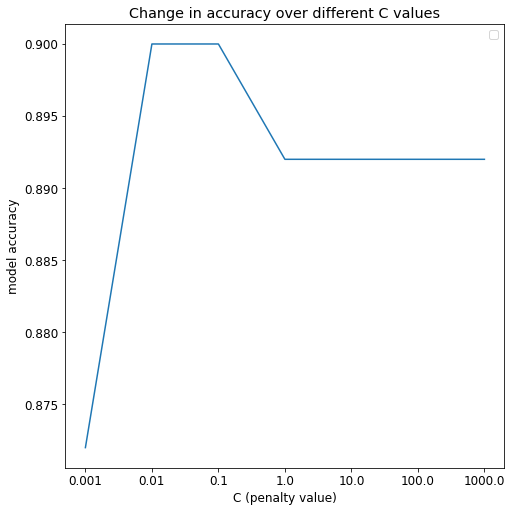

In [36]:
#comparing the accuracy for different values of C in LinearSVC
c_var = np.array([accuracy_score(SVC4_predictions, val_y),accuracy_score(SVC3_predictions, val_y),accuracy_score(SVC2_predictions, val_y),accuracy_score(SVC1_predictions, val_y),accuracy_score(SVC5_predictions, val_y),accuracy_score(SVC6_predictions, val_y),accuracy_score(SVC7_predictions, val_y)])
iter = np.array([0.001,0.01,0.1,1,10,100,1000])

plt.figure(figsize = (7,7))
rightx = range(len(iter))
plt.plot(rightx, c_var)
plt.xticks(rightx, iter)
plt.ylabel('model accuracy')
plt.xlabel('C (penalty value)')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Change in accuracy over different C values", loc='center')

plt.show()

In [44]:
#comparing with baseline predictor

# X_train, X_test, y_train, y_test = train_test_split(X_new, y)
# model = LogisticRegression().fit(X_train, y_train)
# predictions = model.predict(X_test)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(X_train, y_train)
ydummy = dummy.predict(X_test)
from sklearn.metrics import mean_squared_error
print('square error of LR model (With added features): %f\nsquare error of baseline dummy model: %f'%(mean_squared_error(y_test,predictions),mean_squared_error(y_test,ydummy)))

square error of LR model (With added features): 0.112000
square error of baseline dummy model: 0.921827
